In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

# <b> LOAD DATA

In [30]:
paris = pd.read_csv('C://Users//dangq//OneDrive//Máy tính//USTH//ICT//Time Series//practice//dataset//paris_temperature.csv')
paris.head(2)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Paris,France",2023-10-01,26.5,12.5,18.9,26.5,12.5,18.9,13.7,74.3,...,3.5,3,10,2023-10-01T07:49:34,2023-10-01T19:30:27,0.57,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"07149099999,07156099999,07146099999,0715709999..."
1,"Paris,France",2023-10-02,27.7,14.5,20.7,27.9,14.5,20.7,14.7,71.0,...,4.4,4,10,2023-10-02T07:51:01,2023-10-02T19:28:21,0.60,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"07149099999,07156099999,07146099999,0715709999..."


# <b> EDA

## Descriptive Statistics

In [31]:
paris.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.802356,10.096859,13.279319,16.541623,8.974869,12.624346,8.784293,76.118586,2.053552,71.432461,...,18.495550,209.079843,1013.928796,79.876178,19.180628,49.813874,4.296335,2.913613,10.746073,0.481990
std,6.840083,5.057506,5.819955,7.388110,6.197290,6.674208,4.779705,10.214621,3.939574,44.425978,...,6.069653,87.970190,10.349025,19.049478,4.334291,37.130885,3.214728,2.267046,5.473000,0.289633
min,-1.300000,-4.100000,-1.800000,-5.500000,-7.300000,-6.300000,-6.100000,51.600000,0.000000,0.000000,...,6.800000,0.400000,979.700000,13.000000,5.100000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,11.800000,6.625000,9.300000,11.800000,4.600000,8.025000,6.200000,68.600000,0.000000,0.000000,...,13.900000,180.750000,1008.900000,71.200000,16.800000,16.825000,1.400000,1.000000,10.000000,0.242500
50%,16.150000,10.200000,13.050000,16.150000,10.200000,13.050000,9.150000,76.750000,0.195000,100.000000,...,17.850000,222.000000,1014.650000,85.600000,20.300000,43.500000,3.800000,2.000000,10.000000,0.480000
75%,21.850000,13.600000,17.575000,21.850000,13.600000,17.575000,12.175000,84.475000,2.143000,100.000000,...,21.975000,265.675000,1019.900000,94.075000,22.100000,76.325000,6.500000,4.000000,10.000000,0.750000
max,36.200000,21.200000,28.300000,39.000000,21.200000,29.600000,20.300000,95.000000,25.008000,100.000000,...,44.300000,358.200000,1042.800000,100.000000,39.100000,169.800000,14.700000,8.000000,75.000000,0.980000


In [32]:
paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              382 non-null    object 
 1   datetime          382 non-null    object 
 2   tempmax           382 non-null    float64
 3   tempmin           382 non-null    float64
 4   temp              382 non-null    float64
 5   feelslikemax      382 non-null    float64
 6   feelslikemin      382 non-null    float64
 7   feelslike         382 non-null    float64
 8   dew               382 non-null    float64
 9   humidity          382 non-null    float64
 10  precip            382 non-null    float64
 11  precipprob        382 non-null    float64
 12  precipcover       382 non-null    float64
 13  preciptype        308 non-null    object 
 14  snow              382 non-null    float64
 15  snowdepth         382 non-null    float64
 16  windgust          382 non-null    float64
 1

## Time convertion ( date time )

In [33]:
paris['datetime'] = pd.to_datetime(paris['datetime'])
# month = paris['datetime'].dt.month
# year = paris['datetime'].dt.year
# day = paris['datetime'].dt.day

paris['sunrise'] = pd.to_datetime(paris['sunrise'])
paris['sunset'] = pd.to_datetime(paris['sunset'])
paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              382 non-null    object        
 1   datetime          382 non-null    datetime64[ns]
 2   tempmax           382 non-null    float64       
 3   tempmin           382 non-null    float64       
 4   temp              382 non-null    float64       
 5   feelslikemax      382 non-null    float64       
 6   feelslikemin      382 non-null    float64       
 7   feelslike         382 non-null    float64       
 8   dew               382 non-null    float64       
 9   humidity          382 non-null    float64       
 10  precip            382 non-null    float64       
 11  precipprob        382 non-null    float64       
 12  precipcover       382 non-null    float64       
 13  preciptype        308 non-null    object        
 14  snow              382 non-

In [34]:
# Sort value by datetime
paris.sort_values(by=['datetime'], inplace=True)

Visualize temperature over time


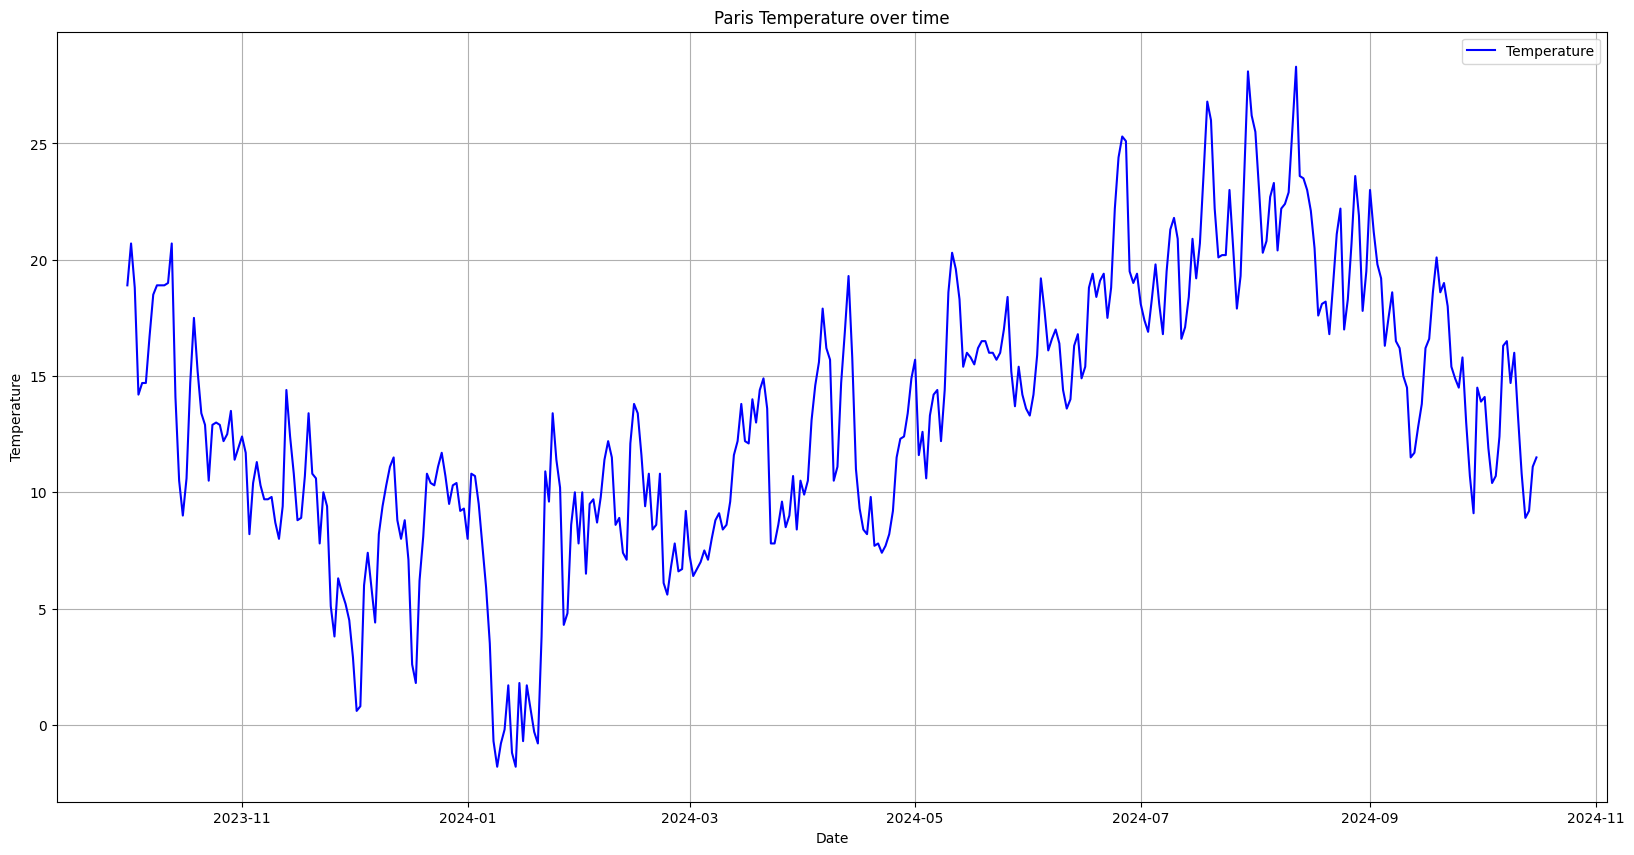

In [35]:
plt.figure(figsize=(20,10))
plt.plot(paris['datetime'], paris['temp'], label='Temperature', color='b')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Paris Temperature over time')
plt.grid(True)


plt.legend()
plt.show()


## Null Value Analysis

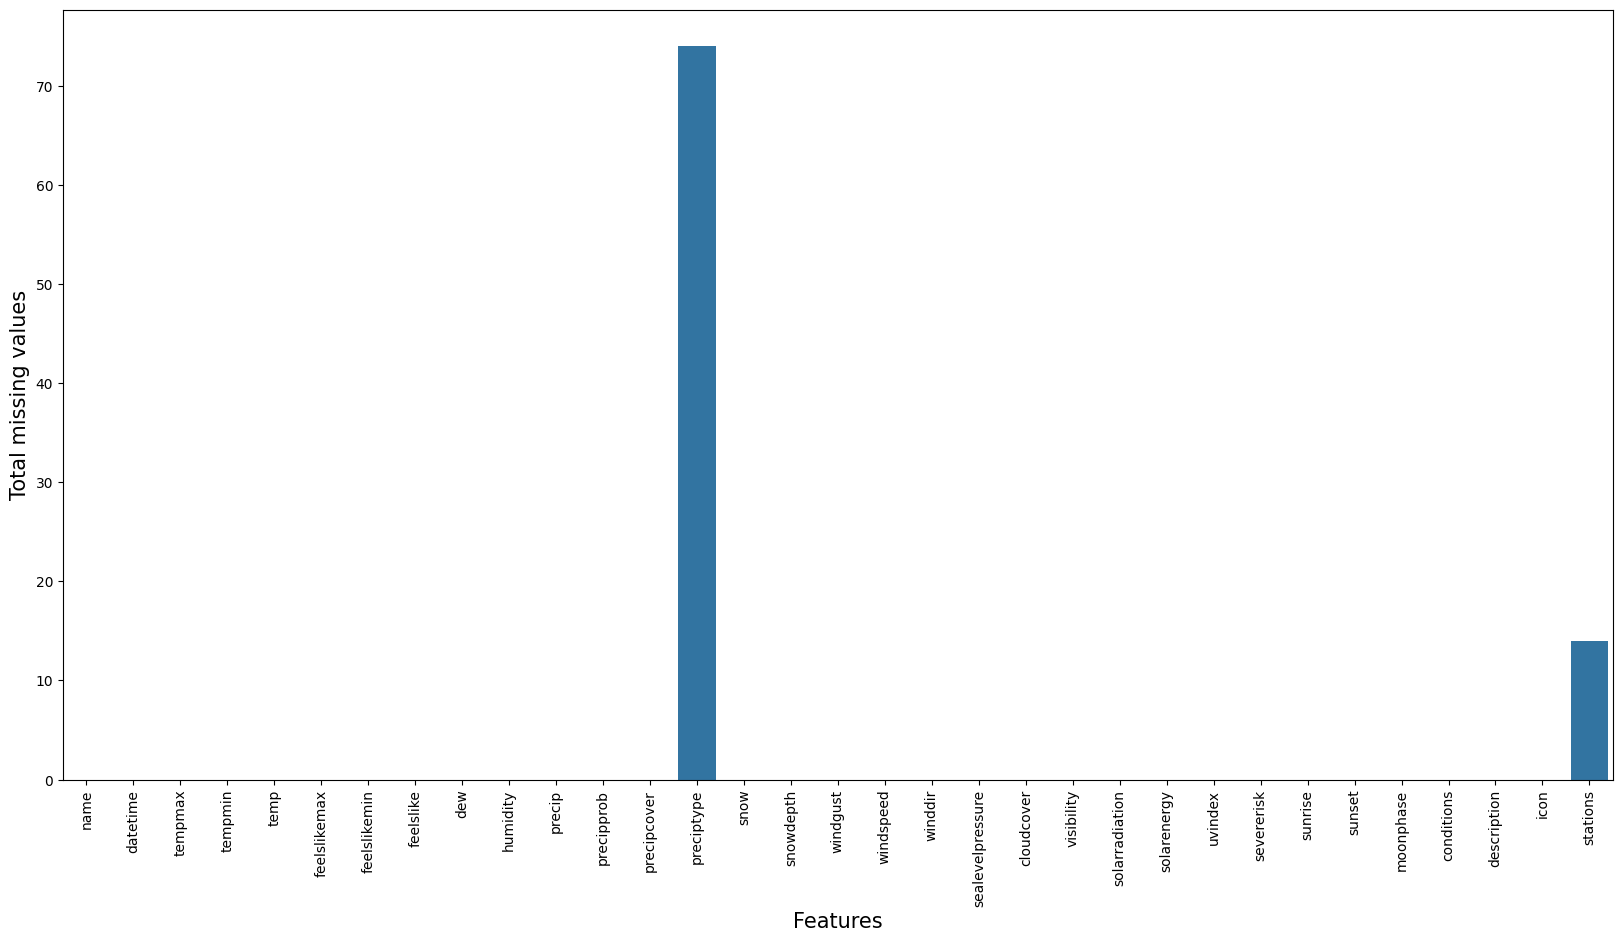

In [36]:
# Check the total missing value
NaN_val = paris.isna().sum()

# Plot missing value
plt.figure(figsize=(20,10))
sns.barplot(x=NaN_val.index, y=NaN_val.values)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Total missing values', fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [37]:
paris.dropna(inplace=True)

In [38]:
paris.isna().sum()

name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64

## Correlation of each numeric column

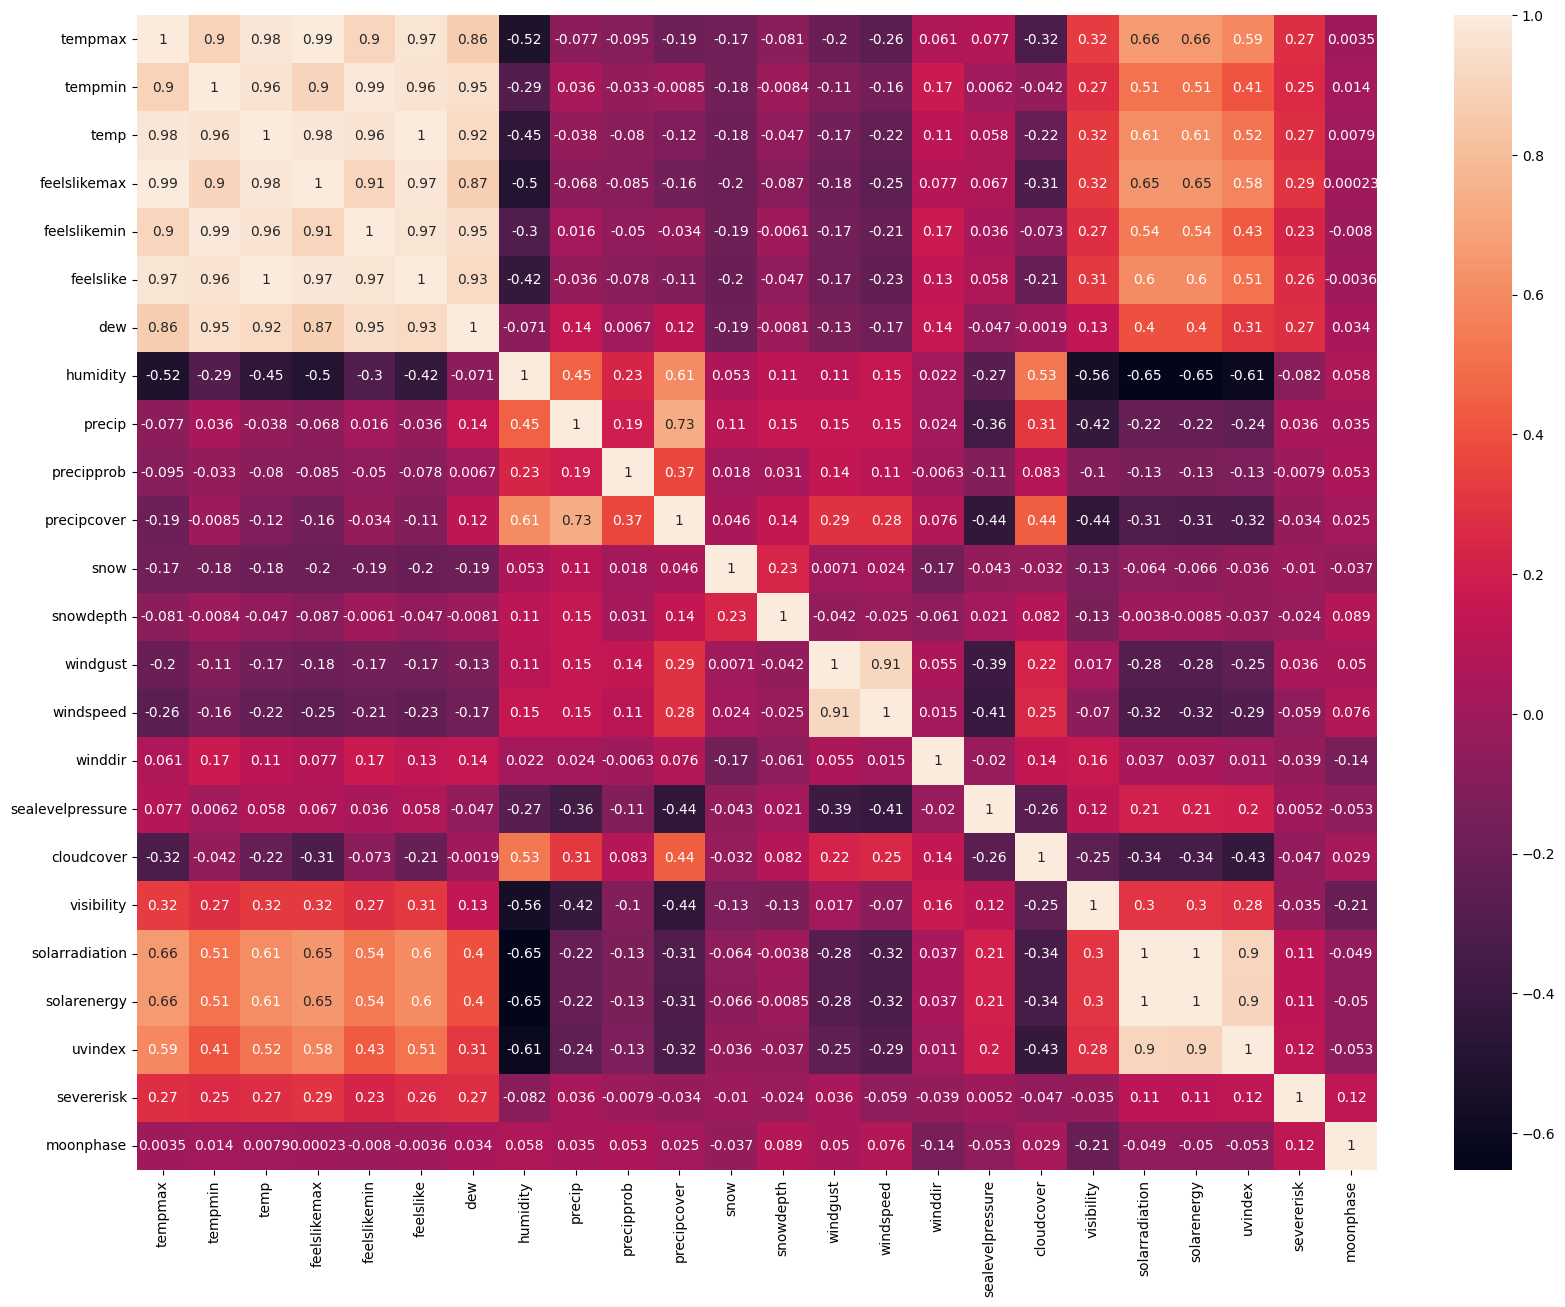

In [39]:
# Pick only numerical data
paris_num = paris.select_dtypes(include=['float64', 'int64']).copy()

# Correlation of numerical columns
paris_corr = paris_num.corr()

# Plot correlation
plt.figure(figsize=(20, 15))
sns.heatmap(paris_corr, annot=True)
plt.show()

1. **Strongly Correlated Features with Temperature**:

- **`tempmax` and `temp` (Correlation ~ 0.98)**  
  - `tempmax` is highly correlated with `temp`, meaning that maximum temperature on a given day has a direct impact on the daily average temperature.  

- **`tempmin` and `temp` (Correlation ~ 0.96)**  
  - `tempmin` (minimum temperature) is also strongly correlated with `temp`, indicating that daily lows contribute significantly to the average temperature.  

- **`feelslikemax` and `temp` (Correlation ~ 0.98)**  
  - The "feels like" temperature accounts for humidity, wind, and other factors affecting human perception of temperature.   

- **`feelslikemin` and `temp` (Correlation ~ 0.96)**  
  - Similar to `feelslikemax`, this variable represents perceived minimum temperature

- **`feelslike` and `temp` (Correlation ~ 1)**  
  - This metric provides an overall "feels like" temperature, which aligns closely with actual temperature trends.  


2. **Negative Correlated Features with Temperature**:

- **`humidity` and `temp` (Correlation ~ -0.57)**  
  - Higher humidity is generally associated with lower daytime temperatures, as moisture in the air absorbs heat.  
  - At night, high humidity can trap heat, reducing cooling effects.  
  - This inverse relationship makes `humidity` a useful feature in temperature prediction models, especially for extreme weather conditions.  

- **`sealevelpressure` and `temp` (Correlation ~ -0.45)**  
  - High pressure systems are typically associated with cooler temperatures, while low pressure systems bring warmer weather.  
  - Including `sealevelpressure` in a regression model can help capture atmospheric influences on temperature changes.  

- **`cloudcover` and `temp` (Correlation ~ -0.40)**  
  - More cloud cover generally leads to lower daytime temperatures due to reduced solar radiation.  
  - However, at night, clouds can trap heat, moderating temperature drops.  
  - This makes `cloudcover` an important feature for predicting temperature fluctuations.  

- **`precipitation` (`precip`) and `temp` (Correlation ~ -0.15 to -0.19)**  
  - Rainfall often results in cooler temperatures due to evaporative cooling.  
  - However, the correlation is weaker compared to other factors like humidity or cloud cover.  
  - Precipitation effects are more significant when combined with humidity and wind speed.  

- **`snow` and `temp` (Correlation ~ -0.14)**  
  - Snow-covered surfaces reflect sunlight, leading to lower temperatures.  
  - Snowfall is often associated with cold weather conditions, reinforcing the negative correlation.  
  - While important in winter climate models, it has less impact in non-snowy regions.  

**Impact on Regression Modeling**
- **Humidity, cloud cover, and pressure are key predictors** of temperature variations.  
- **Precipitation and snow have weaker effects**, but may be important in seasonal models.  
- **Multivariate regression models** should carefully balance these negative correlations with strongly correlated positive features (e.g., `tempmax`, `tempmin`).  

Negative correlations should be used alongside other variables to improve model accuracy in forecasting temperature.  


## Spliting data

In [40]:
train_data = paris[paris['datetime'] <= '2024-09-15']
test_data = paris[paris['datetime'] > '2024-09-15']

In [41]:
train_data.shape, test_data.shape

((281, 33), (15, 33))

# <b>Autoregressive (AR) model

 
## Autocorrelation
Autocorrelation is the correlation of a data series with a lagged version of itself (30 days, 50 days, etc). 
The autocorrelation plot draws the autocorrelation as a function of lag.

* Key Patterns:
    * Positive Autocorrelation: If autocorrelations are high for several lags (close to 1), it means the time series has a **trend** (values in the series are dependent on previous values).
    * Negative Autocorrelation: If the plot shows alternating positive and negative values, it suggests **cyclical patterns**.
    * **Seasonality**: Peaks at regular intervals (e.g., at lag 12 in monthly data) indicate seasonal patterns.
    * No Autocorrelation: If most values are close to zero, it suggests that the time series has no clear pattern or trend.

* Usage of Autocorrelation Plot:
    * Identify Trend or Seasonality: If the autocorrelation decreases slowly, it suggests a trend. Regular peaks may indicate seasonality.
    * Time Series Modeling: Helps in determining if the time series is autocorrelated (good for AR models), and what lags to consider for modeling.
    * Stationarity Testing: If autocorrelations at higher lags remain high, the series is likely non-stationary

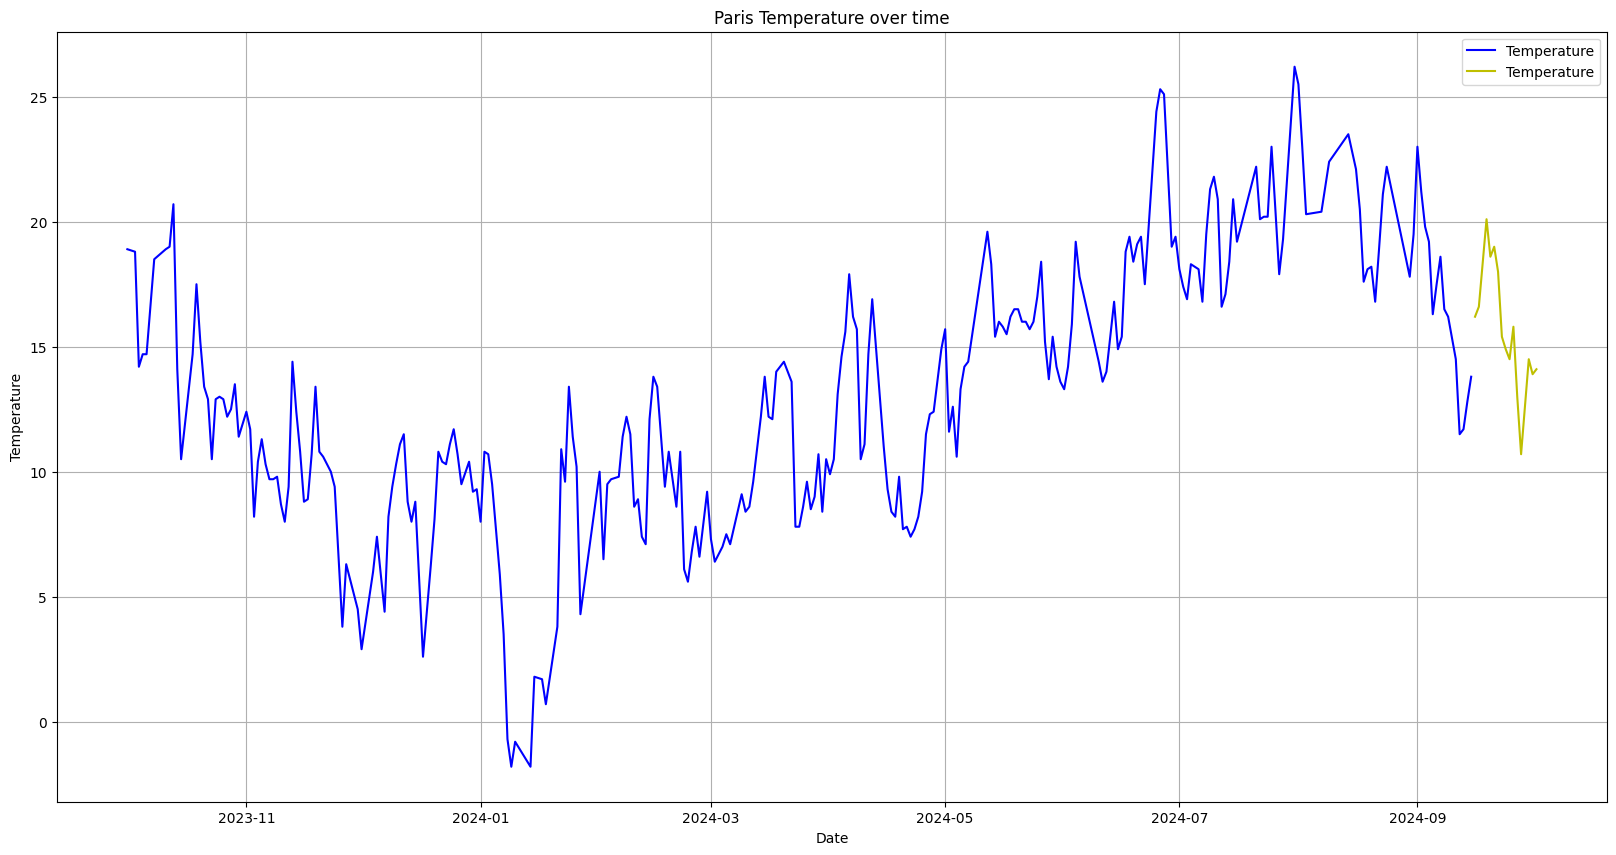

In [42]:
plt.figure(figsize=(20,10))
# plt.plot(paris['datetime'], paris['temp'], label='Temperature', color='b')
plt.plot(train_data['datetime'], train_data['temp'], label='Temperature', color='b')
plt.plot(test_data['datetime'], test_data['temp'], label='Temperature', color='y')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Paris Temperature over time')
plt.grid(True)


plt.legend()
plt.show()


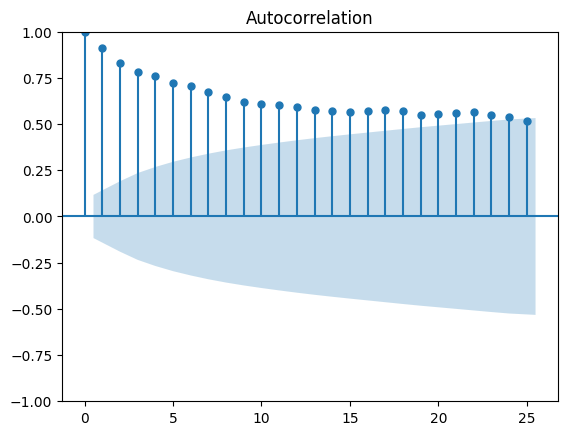

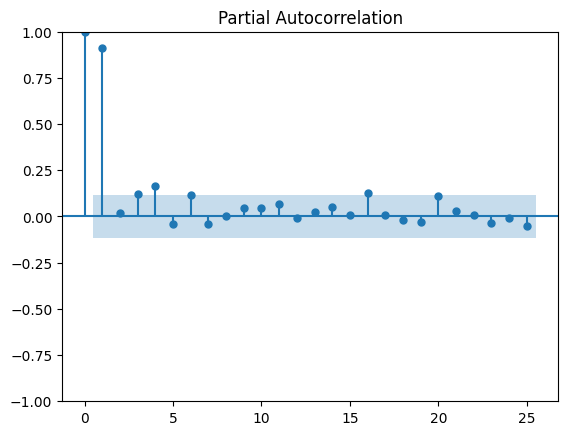

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_original = plot_acf(train_data['temp'])
pacf_original = plot_pacf(train_data['temp'])

In [44]:
# Check stationarity
from statsmodels.tsa.stattools import adfuller
results = adfuller(train_data['temp'].values)
print(f"With p-value: {results[1]}, the data is likely: ")
if results[1] > 0.05:
    print("Non-stationary.")
else:
    print("Stationary.")

With p-value: 0.1780806585818791, the data is likely: 
Non-stationary.


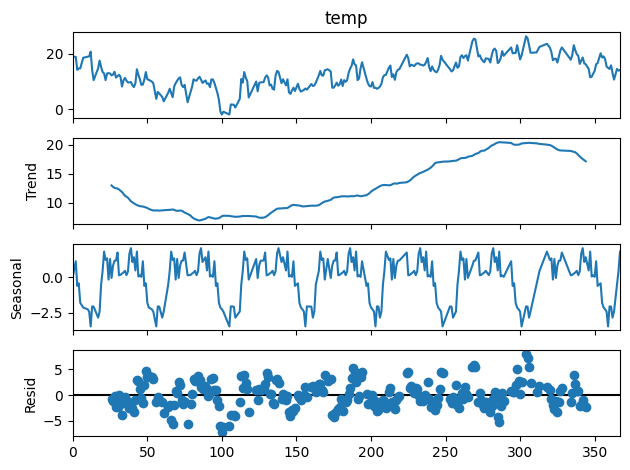

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the humidity time series over n days
res_temp_2 = seasonal_decompose(paris['temp'], model='additive', period=40)

# Plot the decomposition results
res_temp_2.plot()
plt.show()

## Transform to stationary: differencing

<Axes: >

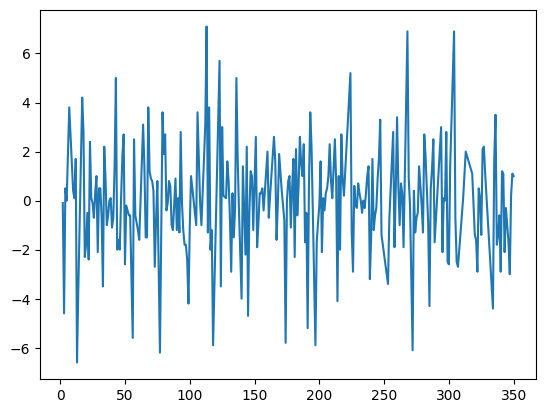

In [46]:
train_data_diff = train_data['temp'].diff().dropna()
train_data_diff.plot()

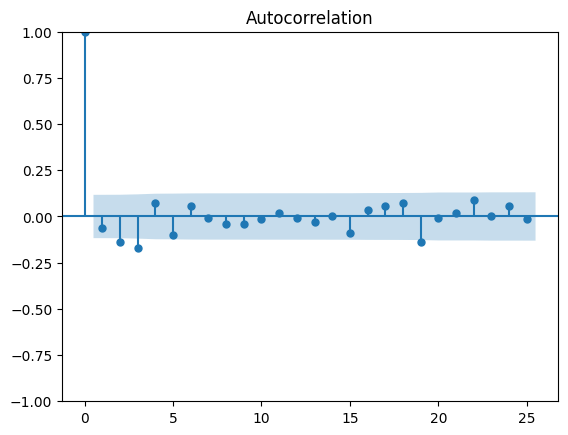

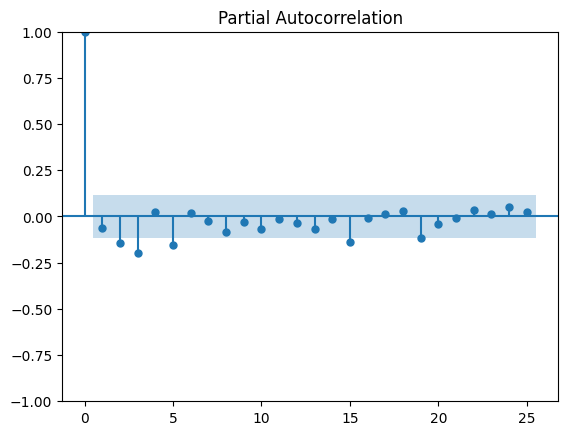

In [47]:
acf_diff = plot_acf(train_data_diff)
pacf_diff = plot_pacf(train_data_diff)

In [48]:
# Check stationarity
results_diff = adfuller(train_data_diff)
print(f"With p-value: {results_diff[1]}, the data is likely: ")
if results_diff[1] > 0.05:
    print("Non-stationary.")
else:
    print("Stationary.")

With p-value: 3.8663802117931024e-17, the data is likely: 
Stationary.


In [49]:
def determine_differencing_order(data):
    d = 0
    p_value = adfuller(data)[1]
    while p_value > 0.05:
        d = d + 1
        data = data.diff().dropna()
        p_value = adfuller(data)[1]
    
    print("Suitable d differencing: ", d)
    return d

d_orders = determine_differencing_order(train_data['temp'])

Suitable d differencing:  1


## Train model

In [50]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data['temp'], order=(1,1,1)) # (p,d,q)
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                  281
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -611.307
Date:                Wed, 05 Mar 2025   AIC                           1228.614
Time:                        17:02:24   BIC                           1239.519
Sample:                             0   HQIC                          1232.988
                                - 281                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7349      0.075      9.737      0.000       0.587       0.883
ma.L1         -0.9222      0.043    -21.460      0.000      -1.006      -0.838
sigma2         4.6048      0.320     14.405      0.0

c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\dangq

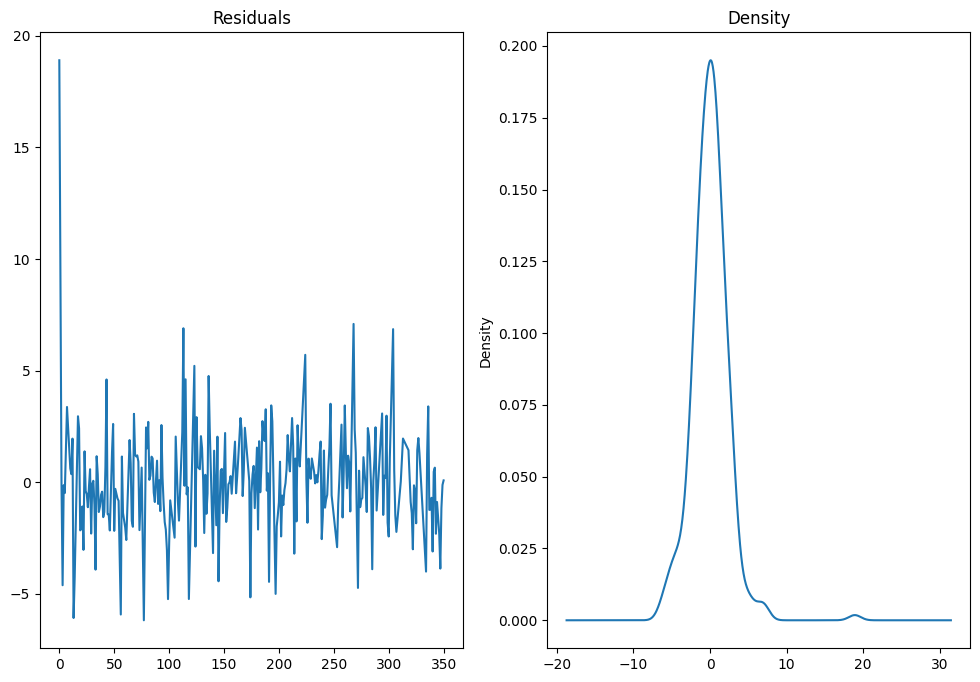

In [51]:
residuals = model_fit.resid
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
residuals.plot(title = "Residuals", ax=ax[0])
residuals.plot(kind='kde', title = "Density", ax=ax[1])
plt.show()

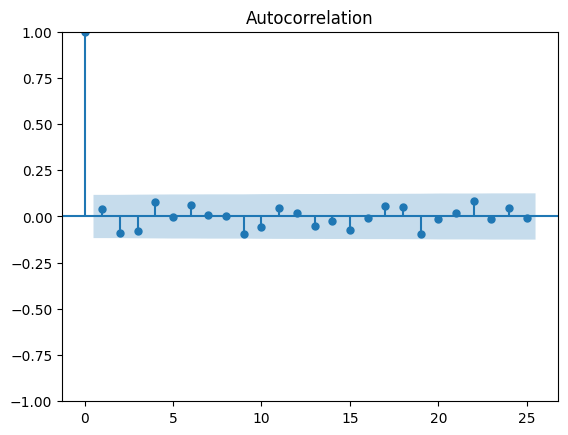

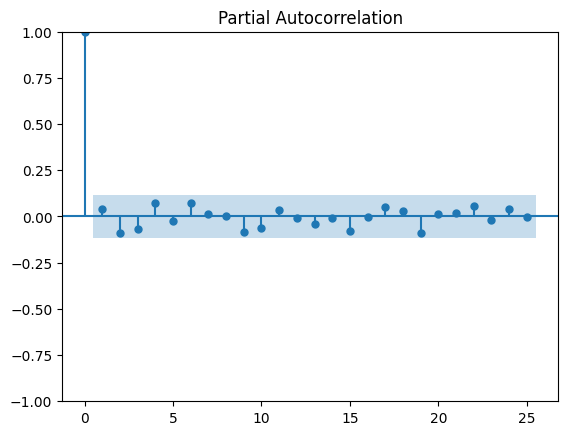

In [52]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

In [53]:
from sklearn.metrics import r2_score
# Forecast for the length of the test set
forecast_test = model_fit.forecast(steps=len(test_data['temp']))
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((forecast_test - test_data['temp']) ** 2))
print(f"Roor Mean Squared Error: {rmse}")
# Calculate R-squared
r2 = r2_score(test_data['temp'], forecast_test)
print(f"R2 Score: {r2}")

Roor Mean Squared Error: nan
R2 Score: -0.28614278433650386


c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [54]:
# forecast = model_fit.forecast(steps=30)  
# # Create future dates
# future_dates = pd.date_range(start=train_data['datetime'].iloc[-1], periods=30+1, freq='D')[1:]

# # Plot original data
# plt.figure(figsize=(12,6))
# plt.plot(train_data['datetime'], train_data['temp'], label='Train Data', color='b')
# plt.plot(test_data['datetime'], test_data['temp'], label='Test Data', color='y')

# # Plot forecasted values
# plt.plot(future_dates, forecast, label='Forecast (30 Days)', color='r', linestyle='dashed')

# # Formatting
# plt.xlabel('Date')
# plt.ylabel('Temperature')
# plt.title('Paris Temperature Forecast (Next 30 Days)')
# plt.legend()
# plt.grid(True)
# plt.show()

In [55]:
# # Forecast for the next 30 days
# forecast_steps = 30
# forecast_values = model_fit.forecast(steps=forecast_steps)

# # Create future dates for forecast
# future_dates = pd.date_range(start=train_data['datetime'].iloc[-1], periods=forecast_steps+1, freq='D')[1:]

# # Get in-sample fitted values
# fitted_values = model_fit.fittedvalues  # These are the predicted values for training data

# # Plot Training Data
# plt.figure(figsize=(12,6))
# plt.plot(train_data['datetime'], train_data['temp'], label='Train Data', color='b')

# # Plot Testing Data
# plt.plot(test_data['datetime'], test_data['temp'], label='Test Data', color='y')

# # Plot In-Sample Fitted Values
# plt.plot(train_data['datetime'][0:], fitted_values, label='Fitted Values', color='g', linestyle='dashed')

# # Plot Forecasted Values (Next 30 Days)
# plt.plot(future_dates, forecast_values, label='Forecast (30 Days)', color='r', linestyle='dashed')

# # Formatting
# plt.xlabel('Date')
# plt.ylabel('Temperature')
# plt.title('Paris Temperature Forecast & Model Fit')
# plt.legend()
# plt.grid(True)
# plt.show()

c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


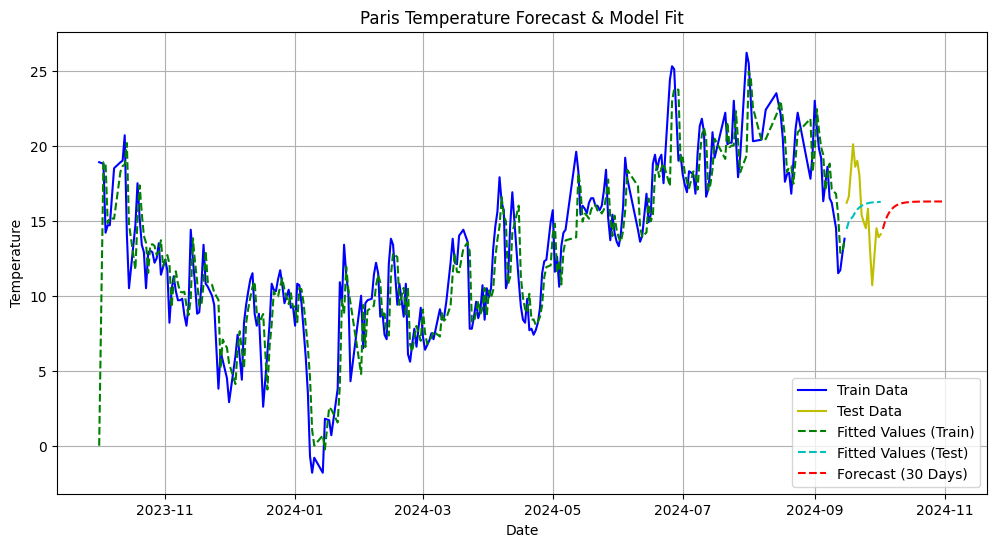

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Forecast for the next 30 days
forecast_steps = 30
forecast_values = model_fit.forecast(steps=forecast_steps)

# Create future dates for forecast
future_dates = pd.date_range(start=test_data['datetime'].iloc[-1], periods=forecast_steps+1, freq='D')[1:]

# Get in-sample fitted values (Training Data)
fitted_values_train = model_fit.fittedvalues  

# Get fitted values for Test Set using `.predict()`
start_idx = len(train_data)  # Start from the first index of test data
end_idx = start_idx + len(test_data) - 1  # End at the last index of test data
fitted_values_test = model_fit.predict(start=start_idx, end=end_idx)  # Fitted values for test set

# Plot Training Data
plt.figure(figsize=(12,6))
plt.plot(train_data['datetime'], train_data['temp'], label='Train Data', color='b')

# Plot Testing Data
plt.plot(test_data['datetime'], test_data['temp'], label='Test Data', color='y')

# Plot In-Sample Fitted Values (Training)
plt.plot(train_data['datetime'], fitted_values_train, label='Fitted Values (Train)', color='g', linestyle='dashed')

# Plot Fitted Values for Test Set
plt.plot(test_data['datetime'], fitted_values_test, label='Fitted Values (Test)', color='c', linestyle='dashed')

# Plot Forecasted Values (Next 30 Days)
plt.plot(future_dates, forecast_values, label='Forecast (30 Days)', color='r', linestyle='dashed')

# Formatting
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Paris Temperature Forecast & Model Fit')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# y_true = train_data['temp'][:] 
# y_pred = model_fit.fittedvalues  # ARIMA fitted values

# # Calculate metrics
# r2 = r2_score(y_true, y_pred)
# mae = mean_absolute_error(y_true, y_pred)
# rmse = np.sqrt(mean_squared_error(y_true, y_pred))
# mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # MAPE formula

# # Print metrics result
# print(f"R² Score: {r2:.4f}")
# print(f"Mean Absolute Error (MAE): {mae:.4f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

In [58]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Forecast next 'n' steps (length of test set)
n_forecast = len(test_data)
print(n_forecast)
y_pred = model_fit.forecast(steps=n_forecast)  # Forecasted values
y_true = test_data['temp'].values  # Actual test values

# Calculate metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # MAPE formula

# Print metrics result
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")


15
R² Score: -0.2861
Mean Absolute Error (MAE): 2.3554
Root Mean Squared Error (RMSE): 2.7268
Mean Absolute Percentage Error (MAPE): 15.7000%


c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


## OPTIONAL: Auto-fit ARIMA model

In [59]:
import pmdarima as pm
auto_arima = pm.auto_arima(train_data['temp'], seasonal=False, stepwise=False)
auto_arima

ARIMA(order=(0, 1, 5), scoring_args={}, suppress_warnings=True)

In [60]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  281
Model:               SARIMAX(0, 1, 5)   Log Likelihood                -606.460
Date:                Wed, 05 Mar 2025   AIC                           1226.919
Time:                        17:02:30   BIC                           1252.363
Sample:                             0   HQIC                          1237.125
                                - 281                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0063      0.049     -0.129      0.897      -0.101       0.089
ma.L1         -0.0982      0.065     -1.512      0.131      -0.226       0.029
ma.L2         -0.2097      0.062     -3.387      0.001      -0.331      -0.088
ma.L3         -0.2140      0.060     -3.540      0.000      -0.333      -0.096
ma.L4          0.0510      0.062      0.825      0.409      -0.070       0.172
ma.L5         -0.1636      0.060     -2.716      0.007      -0.282      -0.046
sigma2         4.4462      0.312     14.255      0.000       3.835       5.057
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.92
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                             0.12
Prob(H) (two-sided):                  0.24   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
# pred = auto_arima.predict(n_periods=forecast_steps)

# # Generate future dates for forecast
# future_dates_auto = pd.date_range(start=train_data['datetime'].iloc[-1], periods=forecast_steps+1, freq='D')[1:]

# # Get in-sample fitted values
# fitted_values_auto = auto_arima.predict_in_sample()  # Use predict_in_sample() instead of fittedvalues

# # Plot Training Data
# plt.figure(figsize=(12,6))
# plt.plot(train_data['datetime'], train_data['temp'], label='Train Data', color='b')

# # Plot Testing Data
# plt.plot(test_data['datetime'], test_data['temp'], label='Test Data', color='y')

# # Plot In-Sample Fitted Values
# plt.plot(train_data['datetime'], fitted_values_auto, label='Fitted Values (ARIMA)', color='g', linestyle='dashed')

# # Plot Forecasted Values (Next 30 Days)
# plt.plot(future_dates_auto, pred, label='Forecast (30 Days)', color='r', linestyle='dashed')

# # Formatting
# plt.xlabel('Date')
# plt.ylabel('Temperature')
# plt.title('Paris Temperature Forecast & Model Fit')
# plt.legend()
# plt.grid(True)
# plt.show()

c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the n

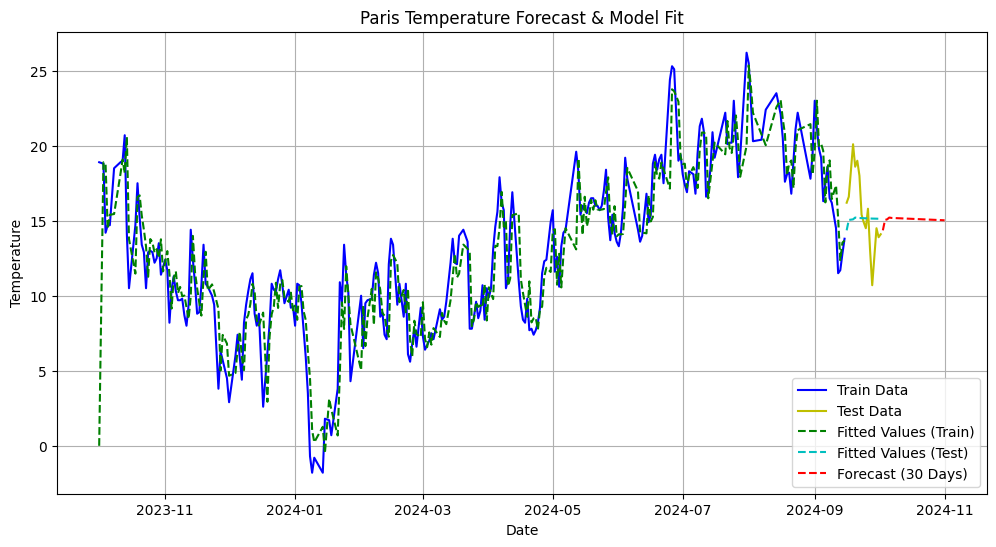

In [62]:
# Forecast for the next 30 days
forecast_steps = 30
pred = auto_arima.predict(n_periods=forecast_steps)  # Forecast future values

# Generate future dates for forecast
future_dates_auto = pd.date_range(start=test_data['datetime'].iloc[-1], periods=forecast_steps+1, freq='D')[1:]

# Get in-sample fitted values (Training Data)
fitted_values_auto = auto_arima.predict_in_sample()  

# Get Fitted Values for the Test Set
test_fitted_values = auto_arima.predict(n_periods=len(test_data))  # Predict for test set

# Plot Training Data
plt.figure(figsize=(12,6))
plt.plot(train_data['datetime'], train_data['temp'], label='Train Data', color='b')

# Plot Testing Data
plt.plot(test_data['datetime'], test_data['temp'], label='Test Data', color='y')

# Plot In-Sample Fitted Values (Training)
plt.plot(train_data['datetime'], fitted_values_auto, label='Fitted Values (Train)', color='g', linestyle='dashed')

# Plot Fitted Values for Test Set
plt.plot(test_data['datetime'], test_fitted_values, label='Fitted Values (Test)', color='c', linestyle='dashed')

# Plot Forecasted Values (Next 30 Days)
plt.plot(future_dates_auto, pred, label='Forecast (30 Days)', color='r', linestyle='dashed')

# Formatting
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Paris Temperature Forecast & Model Fit')
plt.legend()
plt.grid(True)
plt.show()


In [63]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Forecast next 'n' steps (length of test set)
n_forecast = len(test_data)
y_pred = auto_arima.predict(n_periods=n_forecast)  # Forecasted values
y_true = test_data['temp'].values  # Actual test values

# Calculate metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # MAPE formula

# Print metrics result
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")


R² Score: -0.0741
Mean Absolute Error (MAE): 1.9800
Root Mean Squared Error (RMSE): 2.4918
Mean Absolute Percentage Error (MAPE): 12.6675%


c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
